# Working with Database

Data scientists work with raw data and try to find the insights behind the data. Most raw data in different fields are stored in relational databases. 

 SQL is a language used for relational databases to query or get data out of a database and there are software tools to manage the data in the database which is called a database management system or DBMS like MySql and SQLite. 

To be an effective data scientist, you must know how to extract data from these databases using SQL. Direct performing of operations in the database is more efficient.
Data scientists will frequently encounter the need to retrieve data from a SQL data base, such as SQL Server, to conduct an analysis. Additionally, they will need to store the results (generated in  Python, or R) into a SQL Server database to be archived  or future re-use. 

# The Chinook Database

The Chinook database includes tables for artists, albums, media tracks, invoices and customers. There are tables that are related to each other which are created using real data from an iTunes Library ([Download Dataset](http://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip)).<br> 
The below figure shows the data model design.

<img src="Figures/SQLSchem.png" height="1100" width="900">

As you can see there are 11 tables.

* `employees` table (8 rows) stores employees data such as employee id, last name, first name, etc. There is a column that specifies who reports to whom.
* `customers` table (59 rows) stores customers data like name, address, etc. 
* `invoices` & `invoice_items` tables (105 and 16 rows): these together store invoice data. The invoices table stores invoice header data and the invoice_items table stores the invoice line items data.
* `artists` table (275 rows) stores artists data.
* `albums` table (347 rows) stores data about a list of tracks. One artist may have multiple albums.
* `media_types` table (5 rows) stores media format types.
* `genres` table (25 rows) stores music types (pop, rock, etc.)
* `tracks` table (3503 rows) store the data related to songs. Each track has a specified type, gender, composer, etc.
* `playlists` & `playlist_track` tables (18 and 8715 rows) playlists table store data about playlists. Each playlist contains a list of tracks. Each track may belong to multiple playlists.  

# About Sqlite
Unlike to Most relational database management system (RDBMS) such as MySQL, which require a separate server to run a database, SQLite does not need a server to run and easy to use ([Download SQLite](https://www.sqlite.org/download.html)). It is very simple to set up and operate, and relatively has many distinct features over other relational databases. Cons and pros of using SQLite are as follows.

|Cons|Pros|
| ------------- |-------------| 
|No need for servers|no option to do Right or Full Outer Joins|	
|single ordinary disk file|security and protection issues|
| storage of any amount of any data type into any column|-|


The below figure shows a screenshot of SQLite which shows the content of table `invoices`.  

<img src="Figures/SQLiteProg.PNG" height="1100" width="900">

# Working on Database using Notebook
In data science, you may see SQL being called as part of some application written in, perhaps, Python or R. To that end, having an understanding of how these languages play with SQL is not a bad idea. Jupyter notebooks can be used for interactive data analysis with SQL on a relational database. When a connection has been completed your Python code sends SQL statements across the connection to the instance of the database. The database instance then resolves the SQL statements into operations against the data and objects in the database. Any data retrieved is returned to the application. 
There are different ways to interact with database using Notebook.

## Using the sqlite3 module
The sqlite3 module provides a straightforward interface for interacting with SQLite databases.
<br>Similar to CSV file, we can use `pd.read_sql_query` which returns a DataFrame corresponding to the result set of the query string.

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('Data\chinook.db')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
table_albums=pd.read_sql_query("SELECT * FROM  albums" ,conn)
table_sqlite_sequence=pd.read_sql_query("SELECT * FROM  sqlite_sequence" ,conn)
table_artists=pd.read_sql_query("SELECT * FROM  artists"         ,conn)
table_customers=pd.read_sql_query("SELECT * FROM  customers" ,conn)
table_employees=pd.read_sql_query("SELECT * FROM  employees"  ,conn)
table_genres=pd.read_sql_query("SELECT * FROM  genres"  ,conn)
table_invoices=pd.read_sql_query("SELECT * FROM  invoices"  ,conn)
table_invoice_items=pd.read_sql_query("SELECT * FROM  invoice_items"  ,conn)
table_media_types=pd.read_sql_query("SELECT * FROM  media_types"  ,conn)
table_playlists=pd.read_sql_query("SELECT * FROM  playlists"  ,conn)
table_playlist_track=pd.read_sql_query("SELECT * FROM  playlist_track"  ,conn)
table_tracks=pd.read_sql_query("SELECT * FROM  tracks",conn)
table_sqlite_stat1=pd.read_sql_query("SELECT * FROM  sqlite_stat1",conn)


In [3]:
# Exploratory Data Analysis
table_tracks.head()


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


We can use the imported data and show the number of orders for each country.

Text(0, 0.5, 'No. of Orders')

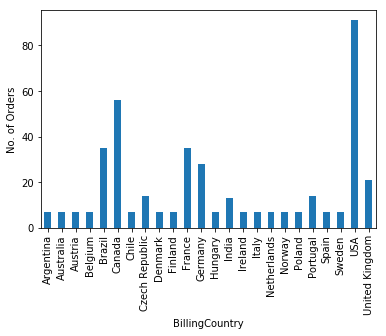

In [4]:
df=table_invoices.groupby('BillingCountry')['BillingCountry'].count()
df.plot.bar()
plt.ylabel('No. of Orders')

We also could interact with a database by querying (retrieving data based on some search parameters) Using  `SELECT` statement string. 

In [5]:
# importing module 
import sqlite3

# connecting to the database 
conn = sqlite3.connect('Data\chinook.db')

# Cursor 
cursor = conn.cursor()
print("Connected to the database successfully")

Connected to the database successfully


In [6]:
#Getting a list of all the tables 
conn = sqlite3.connect('Data\chinook.db')
cursor = conn.cursor()
i=0
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
 i=i+1   
 print(i,':', row)

1 : ('albums',)
2 : ('sqlite_sequence',)
3 : ('artists',)
4 : ('customers',)
5 : ('employees',)
6 : ('genres',)
7 : ('invoices',)
8 : ('invoice_items',)
9 : ('media_types',)
10 : ('playlists',)
11 : ('playlist_track',)
12 : ('tracks',)
13 : ('sqlite_stat1',)


In [7]:
# SELECTING records from the TABLE Media Types
for row in cursor.execute("SELECT MediaTypeID, Name from media_types"):
 print("MediaTypeID = ", row[0])
 print("NAME = ", row[1], "\n")

# To save the changes in the data set.   
conn.commit()

# close the connection
conn.close()

MediaTypeID =  1
NAME =  MPEG audio file 

MediaTypeID =  2
NAME =  Protected AAC audio file 

MediaTypeID =  3
NAME =  Protected MPEG-4 video file 

MediaTypeID =  4
NAME =  Purchased AAC audio file 

MediaTypeID =  5
NAME =  AAC audio file 



## Using Magic SQL

Magic functions (% or %%) are pre-defined functions in Jupyter kernel that executes supplied commands. For convenience, we can use %% sql at the top of a cell to indicate we want the entire cell to be treated as SQL. 

In [8]:
# Required library installation
!pip install sqlalchemy 
!pip install ipython-sql 

In [9]:
# Connect to the database
%load_ext sql
%sql sqlite:///Data\chinook.db

'Connected: @Data\\chinook.db'

We will use the last approach (Magic SQL using %%) for further investigation in the database. 

# Interaction with Chinook Database 

There are five simple commands to create a table, insert data to populate the table, select data from the table, update data in the table, delete data from the table (DDL and DML).

### Create a new Table in the database
There are 11 tables in the database and we will `Create` another one (COUNTRY) with CountryId field as a primary key and country  name field. If the command will be successful, `Done` will be shown in Notebook. Now, you can also check the database using SQLite Browser.

In [10]:
%%sql
-- Create a new Table
create table Country (
    CountryId int NOT NULL,
    NAME varchar(40),
    PRIMARY KEY (CountryId));

 * sqlite:///Data\chinook.db
Done.


[]

We can remove the created table or any other table in the dataset. To remove a specific table we will use `drop`. 

In [11]:
%%sql
-- Remove table COUNTRY 
drop table COUNTRY;

 * sqlite:///Data\chinook.db
Done.


[]

For some reasons, we might want to know the name of all artist. The `select` statement is used to select data from a database in order to do further analysis. 

In [12]:
%%sql
-- Select names of all artists from artist table
select Name from artists;

 * sqlite:///Data\chinook.db
Done.


Name
AC/DC
Accept
Aerosmith
Alanis Morissette
Alice In Chains
Antônio Carlos Jobim
Apocalyptica
Audioslave
BackBeat
Billy Cobham


We need to know the email and city of all customers with Id less than 5. In most time, we need to restrict the result set by using the clause `WHERE`.

In [13]:
%%sql
-- Select Email, City from customer table limited to customer Id less than 5
select Email, City from customers where CustomerId < 5 ;

 * sqlite:///Data\chinook.db
Done.


Email,City
luisg@embraer.com.br,São José dos Campos
leonekohler@surfeu.de,Stuttgart
ftremblay@gmail.com,Montréal
bjorn.hansen@yahoo.no,Oslo


Also, we are going to find all fields from customers who live in Canada

In [14]:
%%sql
-- Select all fields from customer table limited to Canada 
select * from customers where Country = 'Canada'; 

 * sqlite:///Data\chinook.db
Done.


CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
14,Mark,Philips,Telus,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,+1 (780) 434-4554,+1 (780) 434-5565,mphilips12@shaw.ca,5
15,Jennifer,Peterson,Rogers Canada,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca,3
29,Robert,Brown,None,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,+1 (416) 363-8888,None,robbrown@shaw.ca,3
30,Edward,Francis,None,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,+1 (613) 234-3322,None,edfrancis@yachoo.ca,3
31,Martha,Silk,None,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,+1 (902) 450-0450,None,marthasilk@gmail.com,5
32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4
33,Ellie,Sullivan,None,5112 48 Street,Yellowknife,NT,Canada,X1A 1N6,+1 (867) 920-2233,None,ellie.sullivan@shaw.ca,3


In the next cell, we are going to add a new artist (Ali Zand Vakili) to the artists table. With respect to the table format, we need to specify the ArtistID and Name for the new artist. 

In [15]:
%%sql
-- Add new artist Id and name to the current table (artists)
INSERT INTO artists (ArtistId, Name)
VALUES (276, 'Ali ZandVakili');

 * sqlite:///Data\chinook.db
Done.


[]

Then, we will add two albums (Gole Sorkh and Chon Raghs-E Ab) to the `albums` table from the recently added artist with unique Id, name and artist Id.

In [16]:
%%sql
--Add two albums with unique album Ids belong to recently added artist to the data set with unique artist Id
INSERT INTO albums (AlbumId, Title, ArtistId)
VALUES (348, 'Gole Sorkh',276),
       (349, 'Chon Raghs-E Ab',276);


 * sqlite:///Data\chinook.db
Done.


[]

`Update` can be used to change a specific value in the database. We will update the name of last added album of the new artist. 

In [17]:
%%sql
-- Change the name of last added album with albumId of 349 
UPDATE albums SET Title='Otaghe Gooshvareh' where AlbumId=349;

 * sqlite:///Data\chinook.db
Done.


[]

To remove a record the `Delete` statement could be used. Be careful when deleting records in a table! 

In [18]:
%%sql
-- Delete the entire row for the last added album from `albums` table.
DELETE FROM albums where AlbumId=349
;


 * sqlite:///Data\chinook.db
Done.


[]

There are some statements that would be useful. We want to find an artist that we could not remember the name but we know the first name is michele. 
<br>The `LIKE` operator is used in a `WHERE` clause to search for a specified pattern in a column.

In [19]:
%%sql
-- Select artist names start with mich
select Name
from artists
where Name LIKE 'michele%' ;

 * sqlite:///Data\chinook.db
Done.


Name
Michele Campanella


We want to find customers who purchase more and order from the united state to be rewarded with free money or gift cards. The 'Between' operator selects values within a given range. The values can be numbers, text, or dates (begin and end values are included. ).

In [20]:
%%sql
-- Select from invoices table that total value is between 14 and 20, and the billing location is the United State.  
select *
from invoices
where (Total BETWEEN 14 and 20)  and BillingCountry = 'USA' ;

 * sqlite:///Data\chinook.db
Done.


InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
103,24,2010-03-21 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,15.86
201,25,2011-05-29 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,18.86


The next cell shows the employee (Id, first name, last name) sorted by their birthday. The `Order By` keyword is used to sort the result-set in ascending (default) or descending order. To sort the records in descending order, use the 'DESC' 

In [21]:
%%sql
-- Select Employee Id, first name, last name and birthday from employees table which ordered in ascending by birth day
select EmployeeId, FirstName, LastName, BirthDate 
from employees
order by BirthDate;

 * sqlite:///Data\chinook.db
Done.


EmployeeId,FirstName,LastName,BirthDate
4,Margaret,Park,1947-09-19 00:00:00
2,Nancy,Edwards,1958-12-08 00:00:00
1,Andrew,Adams,1962-02-18 00:00:00
5,Steve,Johnson,1965-03-03 00:00:00
8,Laura,Callahan,1968-01-09 00:00:00
7,Robert,King,1970-05-29 00:00:00
6,Michael,Mitchell,1973-07-01 00:00:00
3,Jane,Peacock,1973-08-29 00:00:00


We want to order employee Id, name and birthday with respect to `ReportTo` and within each range sorted by their `Birthday`. If we specify multiple columns, the result set is sorted by the first column (`ReportsTo`) and then that sorted result set is sorted by the second column (`BirthDate`), and so on.  

In [22]:
%%sql
-- order employee Id, name and birthday with respect to ReportTo and within each range sorted by their Birthday 
select EmployeeId,ReportsTo , FirstName, LastName, BirthDate 
from employees
order by  ReportsTo , BirthDate desc;

 * sqlite:///Data\chinook.db
Done.


EmployeeId,ReportsTo,FirstName,LastName,BirthDate
1,None,Andrew,Adams,1962-02-18 00:00:00
6,1,Michael,Mitchell,1973-07-01 00:00:00
2,1,Nancy,Edwards,1958-12-08 00:00:00
3,2,Jane,Peacock,1973-08-29 00:00:00
5,2,Steve,Johnson,1965-03-03 00:00:00
4,2,Margaret,Park,1947-09-19 00:00:00
7,6,Robert,King,1970-05-29 00:00:00
8,6,Laura,Callahan,1968-01-09 00:00:00


To know the number of customers in each country. The `Group` by statement group rows that have the same values into summary rows. The GROUP BY statement is often used with aggregate functions (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.

In [23]:
%%sql
-- No. of customers in each country
select Country, COUNT(*) as "No." 
from customers
group by Country;


 * sqlite:///Data\chinook.db
Done.


Country,No.
Argentina,1
Australia,1
Austria,1
Belgium,1
Brazil,5
Canada,8
Chile,1
Czech Republic,2
Denmark,1
Finland,1


The Unite state has the maximum number of customers. We are interested to know which country have the maximum average purchase. Again, We could use `Group by` with aggregate function `AVG` and sort them. Chile is on the top of the list. However, there is only one customer living in Chile!

In [24]:
%%sql
-- Find the country with the maximum average purchase.
select BillingCountry, AVG(Total) as "Average_Cost"
from invoices
group by BillingCountry order by Average_Cost desc;


 * sqlite:///Data\chinook.db
Done.


BillingCountry,Average_Cost
Chile,6.659999999999999
Hungary,6.517142857142857
Ireland,6.517142857142857
Czech Republic,6.445714285714287
Austria,6.088571428571428
Finland,5.945714285714287
Netherlands,5.8028571428571425
India,5.789230769230769
USA,5.747912087912091
Norway,5.659999999999999


We are interested to find the cities in the world that has more than 1 customers. The important note is The `having` clause was added to SQL because the WHERE keyword **could not** be used with aggregate functions. 

In [25]:
%%sql
-- cities in the world that has more than 1 customers
select City, COUNT(*) AS "No. of Customers more than 1"
from customers
group by City
having COUNT(*) > 1

 * sqlite:///Data\chinook.db
Done.


City,No. of Customers more than 1
Berlin,2
London,2
Mountain View,2
Paris,2
Prague,2
São Paulo,2


We used different statements and operators to find some fact about the data set and used one table at the time. Sometimes, we need to combine data from two or more tables. The below cell shows a combination of two tables using `Where` clause. In this step, we want to know the composer name (from table tracks), song name (from table tracks) and genre name (from table genre) together and ordered by song name while limited to 10 top rows.   

In [26]:
%%sql
-- composer name, song name and genre name together and ordered by song name while limited to 10 top rows
select T.Name as SongName , T.Composer as ComposerName,  G.Name as GenreName
from genres as G, tracks as T
where G.GenreId = T.GenreID
order by  T.Name Desc LIMIT 10;

 * sqlite:///Data\chinook.db
Done.


SongName,ComposerName,GenreName
Último Pau-De-Arara,Corumbá/José Gumarães/Venancio,Soundtrack
Óia Eu Aqui De Novo,None,Soundtrack
Óculos,None,Latin
"Étude 1, In C Major - Preludio (Presto) - Liszt",None,Classical
É que Nessa Encarnação Eu Nasci Manga,Lucina/Luli,Pop
É Uma Partida De Futebol,Samuel Rosa,Rock
É Preciso Saber Viver,Erasmo Carlos/Roberto Carlos,Alternative & Punk
É Fogo,Mônica Marianno,World
Álibi,None,Latin
Água de Beber,Antonio Carlos Jobim/Vinicius de Moraes,Latin


To combine data from two tables, we can also use the JOIN operator. A JOIN combines the rows from two or more tables based on a relationship between certain columns in these tables.
SQL offers you several different types of JOINs. 
<br>
There are two types of table joins, inner join and outer join. The most common type of join is the inner join.
<br>
<img src="Figures/Joints.PNG" height="800" width="600">

An inner join matches the results from two tables and displays only the result set that matches the criteria specified in the query. We want to know the customer name, their postal code, Invoice date and ID and also Track Id from the data base. These information located in three different tables. We need this information for tracks with the volume less than 2 MB. 

In [27]:
%%sql
--  the customer name, their postal code, Invoice date, and ID and also Track Id while track volume is less than 2 MB.
select C.FirstName,C.LastName, C.PostalCode, I.InvoiceDate,II.InvoiceId, II.TrackID

from customers as C 
INNER JOIN invoices as I on C.CustomerId=I.CustomerId 

INNER JOIN invoice_items as II on I.InvoiceId=II.InvoiceId

INNER JOIN tracks as T on T.trackId=II.TrackId

where T.Bytes <2000000

 * sqlite:///Data\chinook.db
Done.


FirstName,LastName,PostalCode,InvoiceDate,InvoiceId,TrackId
Leonie,Köhler,70174,2011-05-19 00:00:00,196,2993
François,Tremblay,H2G 1A7,2010-04-21 00:00:00,110,112
François,Tremblay,H2G 1A7,2010-04-21 00:00:00,110,121
François,Tremblay,H2G 1A7,2010-04-21 00:00:00,110,166
Helena,Holý,14300,2011-05-20 00:00:00,198,3001
Alexandre,Rocha,01310-200,2009-10-17 00:00:00,68,2241
Roberto,Almeida,20040-020,2010-12-25 00:00:00,166,1968
Roberto,Almeida,20040-020,2010-12-25 00:00:00,166,1986
Roberto,Almeida,20040-020,2011-08-25 00:00:00,221,246
Frank,Harris,94043-1351,2011-05-24 00:00:00,200,3059


Outer Join is a specialized form of joint. And there are three types of Outer Join, Left Outer Join, Right Outer Join, and Full Outer Join.
Left join matches the results from two tables and displays all the rows from the left table, and combines the information with rows from the right table that match the criteria specified in the query. In other words, a Left Join matches all the rows from table 1, and combines the information with rows from table 2 that match the criteria specified in the query.

 We want to apply left join find the employees Id and their names and the city that related customers are purchased. As you can see, the customer table has employee Id (SupportRepId) from 3 to 5 while `employees` table has Id from 1 to 8. As the `employees` table is left table, the below result is all rows from `employees` table (Id from 1 to 8) and the records from `customers` table that match the condition of the same ID. 

In [28]:
%%sql
-- apply left join find the employees Id and their names and the city that related customers are purchased. 
select E.EmployeeId,E.LastName,E.FirstName, C.City
-- left table appeared after from
from  employees AS E

LEFT OUTER JOIN customers AS C ON C.SupportRepId=E.EmployeeId

 * sqlite:///Data\chinook.db
Done.


EmployeeId,LastName,FirstName,City
1,Adams,Andrew,None
2,Edwards,Nancy,None
3,Peacock,Jane,São José dos Campos
3,Peacock,Jane,Montréal
3,Peacock,Jane,Rio de Janeiro
3,Peacock,Jane,Vancouver
3,Peacock,Jane,New York
3,Peacock,Jane,Cupertino
3,Peacock,Jane,Chicago
3,Peacock,Jane,Toronto


A right join matches the results from two tables and displays all the rows from the right table and combines the information with rows from the left table that matched the criteria specified in the query. the result set of a right join is all rows from both tables matching the criteria specified in the query plus all non-matching rows from the right table
 The full join keyword returns all rows from both tables.
<br> 
RIGHT and FULL OUTER JOINs are not currently supported. For RIGHT JOINS we can use a left join and switching the tables.

 <br>
 We want to apply the right joint to the `employees` table (or left joint to the `customers` table) to find Id and name and the city that related customers are purchased. As the `customers` table is left table the below result is all rows from `customers` table (Id from 3 to 5) and the records from `employees` table that match the condition of the same ID (there is no match in this case)  

In [29]:
%%sql
-- apply left join to the `customers` table to find the employees Id and name and the city that related customers are purchased
select E.EmployeeId,E.LastName,E.FirstName,C.City as "CustomerCity"
-- Consider customer table as left table (equal to right joint to the `employees` table)
from  customers AS C
-- First table appeared after ON (customers)
LEFT OUTER JOIN employees AS E ON C.SupportRepId=E.EmployeeId

 * sqlite:///Data\chinook.db
Done.


EmployeeId,LastName,FirstName,CustomerCity
3,Peacock,Jane,São José dos Campos
5,Johnson,Steve,Stuttgart
3,Peacock,Jane,Montréal
4,Park,Margaret,Oslo
4,Park,Margaret,Prague
5,Johnson,Steve,Prague
5,Johnson,Steve,Vienne
4,Park,Margaret,Brussels
4,Park,Margaret,Copenhagen
4,Park,Margaret,São Paulo


 The FULL OUTER JOIN keyword return all records when there is a match in either left or right table records. For FULL OUTER JOIN UNION the result of LEFT and RIGHT( again swapped LEFT JOIN) JOIN results.

In [30]:
%%sql
select E.EmployeeId,E.LastName,E.FirstName,C.City as "CustomerCity"
from  employees AS E
LEFT OUTER JOIN customers AS C ON C.SupportRepId=E.EmployeeId

union

select E.EmployeeId,E.LastName,E.FirstName,C.City
from  customers AS C
LEFT OUTER JOIN employees AS E ON C.SupportRepId=E.EmployeeId

 * sqlite:///Data\chinook.db
Done.


EmployeeId,LastName,FirstName,CustomerCity
1,Adams,Andrew,None
2,Edwards,Nancy,None
3,Peacock,Jane,Bangalore
3,Peacock,Jane,Berlin
3,Peacock,Jane,Bordeaux
3,Peacock,Jane,Budapest
3,Peacock,Jane,Chicago
3,Peacock,Jane,Cupertino
3,Peacock,Jane,Delhi
3,Peacock,Jane,Dijon
